# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

C:\Users\Q\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


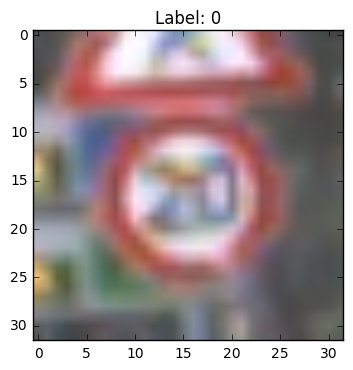

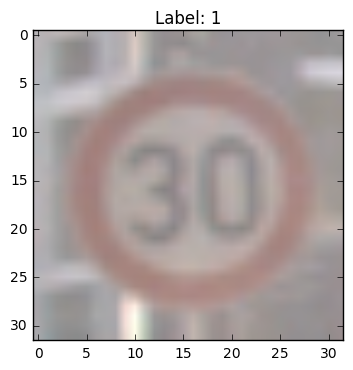

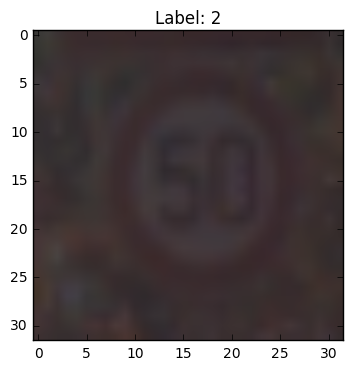

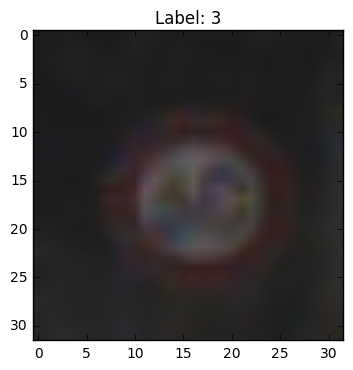

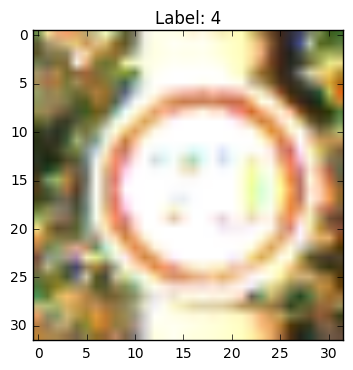

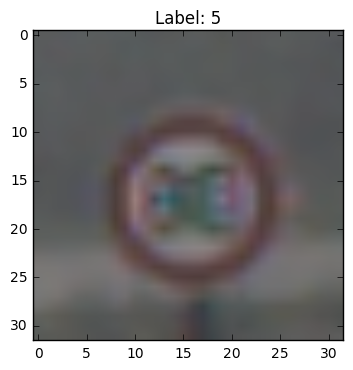

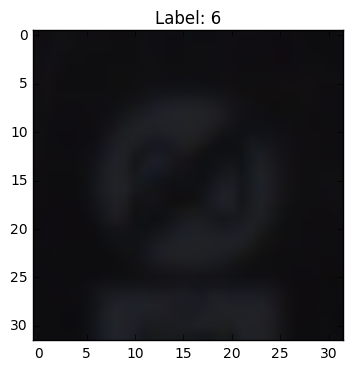

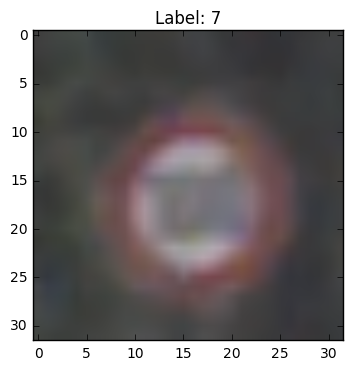

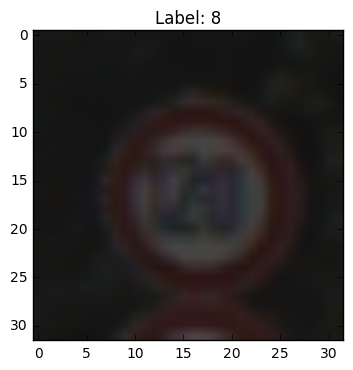

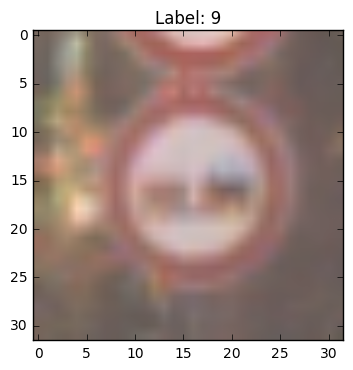

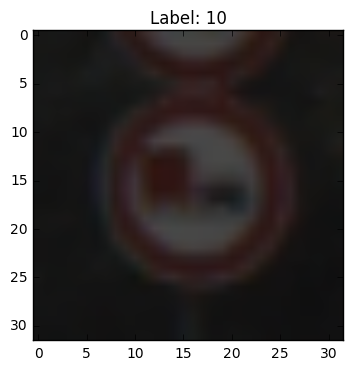

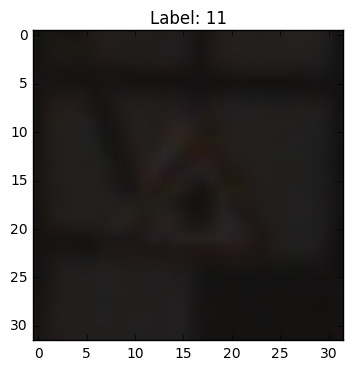

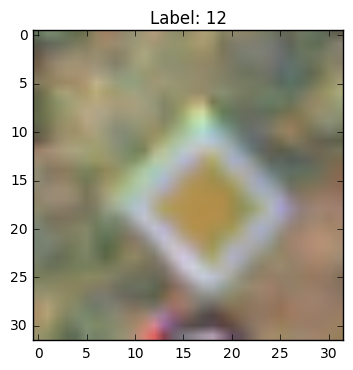

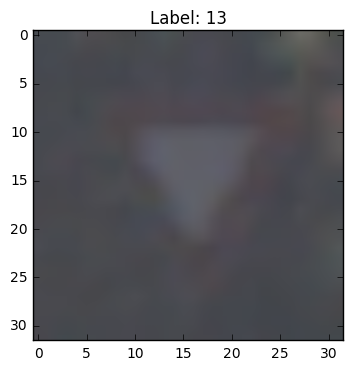

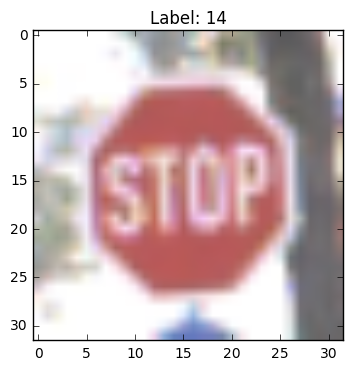

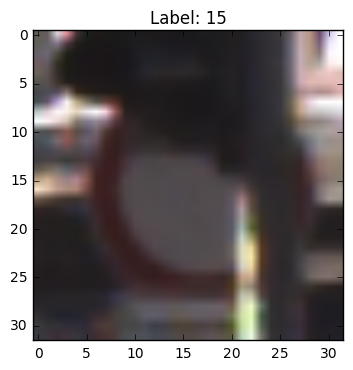

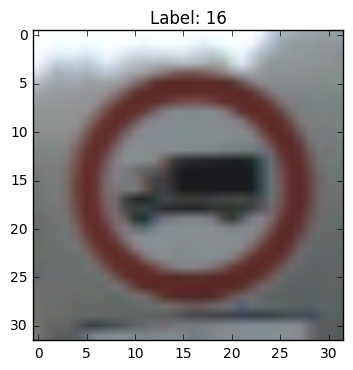

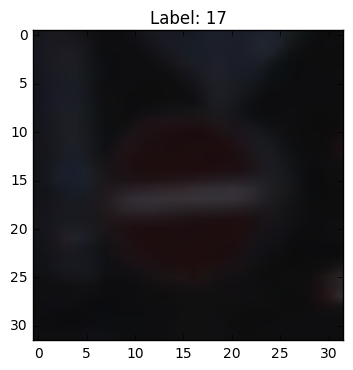

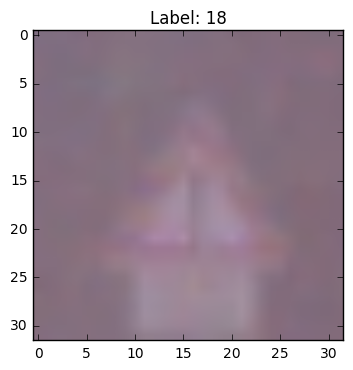

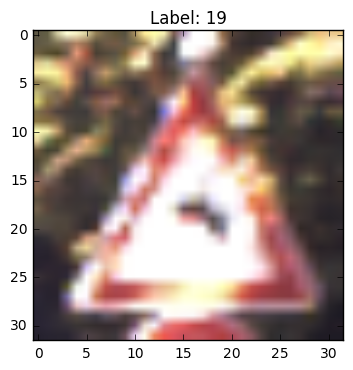

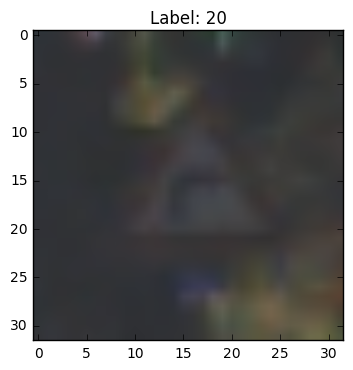

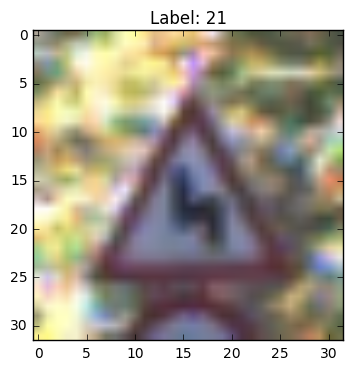

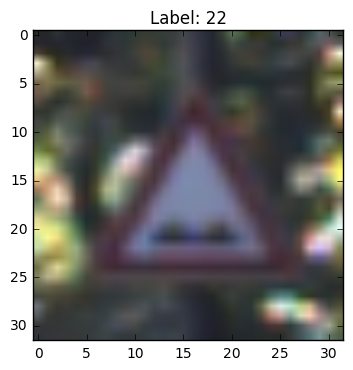

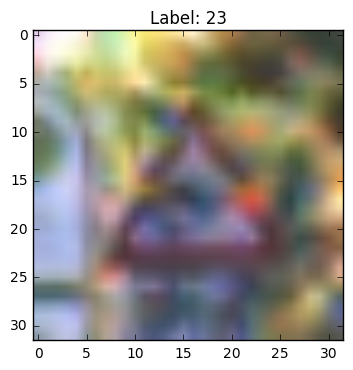

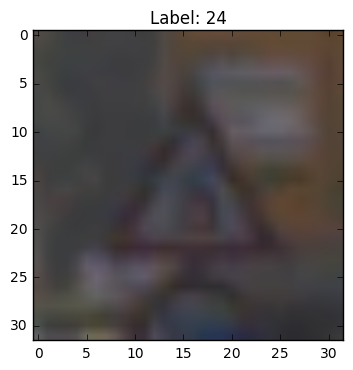

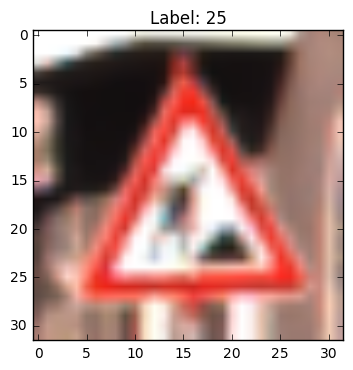

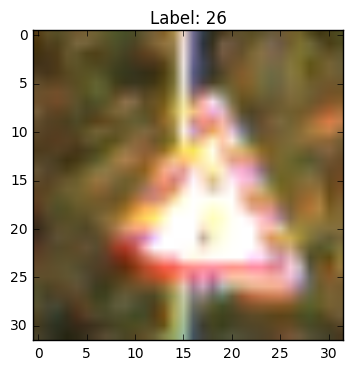

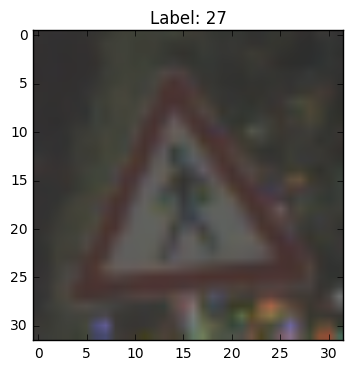

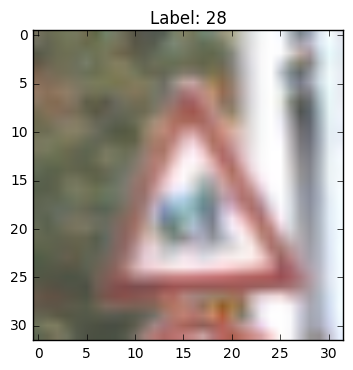

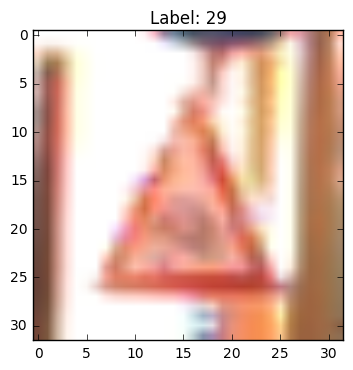

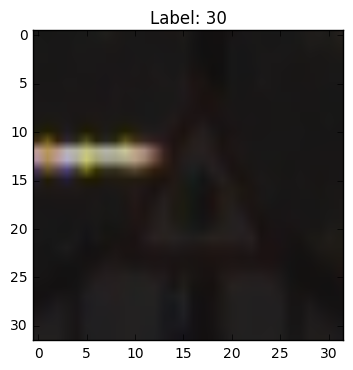

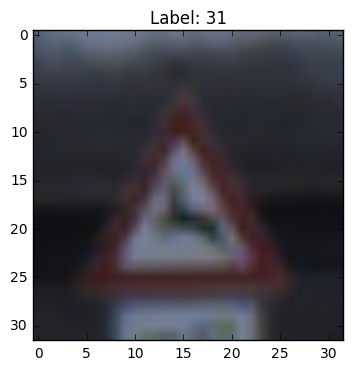

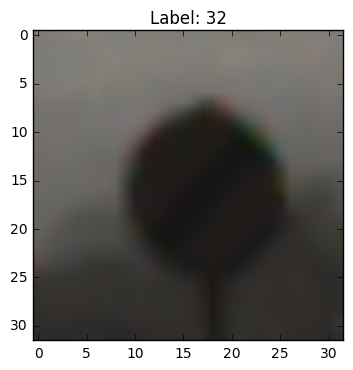

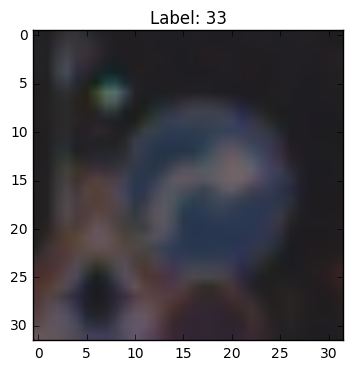

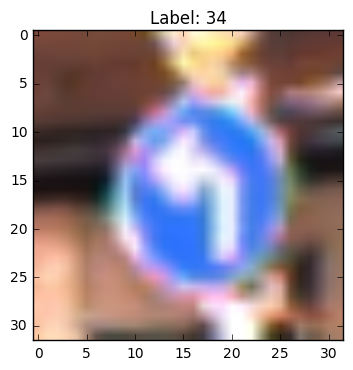

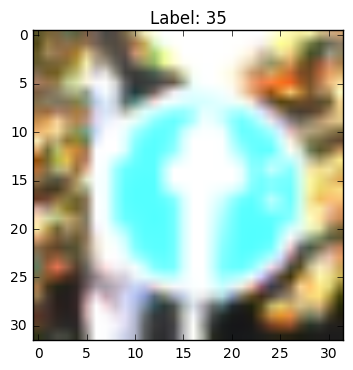

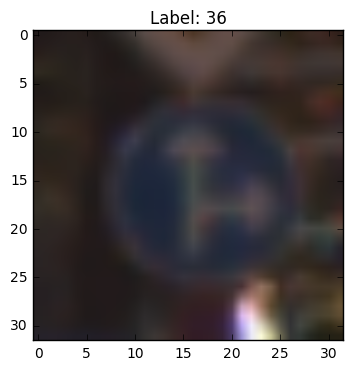

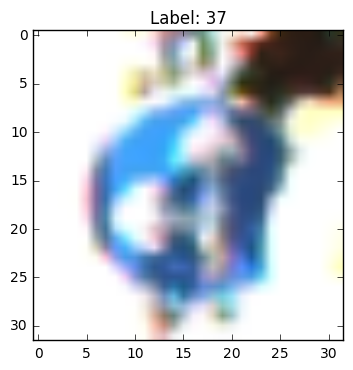

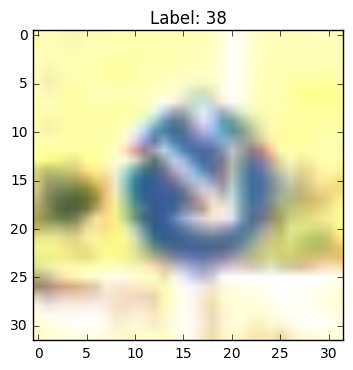

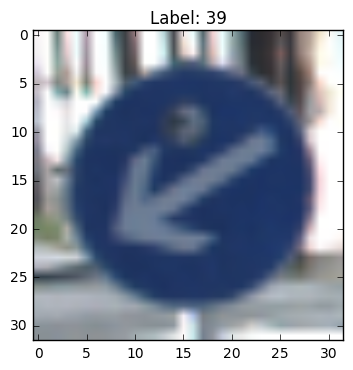

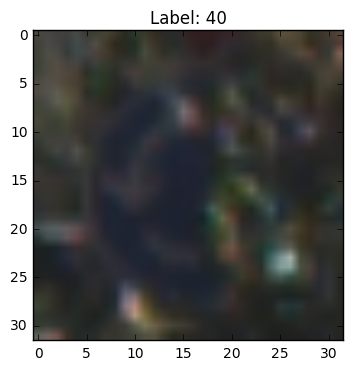

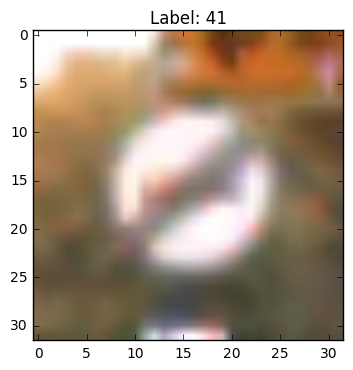

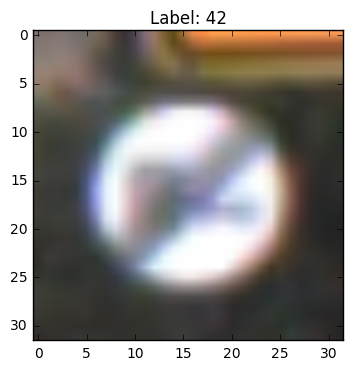

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

n_plot_count = 0
import cv2
for i in range(n_classes):
    for j in range(n_train):
        if y_train[j] == i:
            plt.figure(i)
            plt.imshow(X_train[j], hold = True)
            plt.title('Label: ' + str(i))
#             gray = cv2.cvtColor(X_train[j],cv2.COLOR_RGB2GRAY)

#             # Define a kernel size for Gaussian smoothing / blurring
#             kernel_size = 3 # Must be an odd number (3, 5, 7...)
#             blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

#             # Define our parameters for Canny and run it
#             low_threshold = 10
#             high_threshold = 100
#             edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

#             # Display the image
#             plt.imshow(edges, cmap='Greys_r', hold = True)

            break
    
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np



### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_



**Answer:**

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

sess = tf.InteractiveSession()

def weight_variable(shape):
	initial = tf.truncated_normal(shape, stddev=0.1)
	return tf.Variable(initial)

def bias_variable(shape):
	initial = tf.constant(0.1, shape = shape)
	return tf.Variable(initial)

# Convolution and pooling
def conv2d(x,w):
	return tf.nn.conv2d(x,w,strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
	return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

# Define variables
w_conv1 = weight_variable([5, 5, 3, 16])
b_conv1 = bias_variable([16])
w_conv2 = weight_variable([3, 3, 16, 64])
b_conv2 = bias_variable([64])

w_fc1 = weight_variable([8*8*64, 1200])
b_fc1 = bias_variable([1200])
w_fc2 = weight_variable([1200, n_classes])
b_fc2 = bias_variable([n_classes])
# w_fc3 = weight_variable([500, n_classes])
# b_fc3 = bias_variable([n_classes])

x = tf.placeholder('float', shape = [None, image_shape[0]*image_shape[1]*image_shape[2]])
y_label = tf.placeholder('float', shape = [None, n_classes])

x_image = tf.reshape(x, [-1,image_shape[0],image_shape[1],image_shape[2]])
# Convolution and pooling
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

h_pool2_flat = tf.reshape(h_pool2, [-1, 8*8*64])

# Fully connected layers
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)
# h_fc2 = tf.nn.relu(tf.matmul(h_fc1, w_fc2) + b_fc2)

# Dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# output
output = tf.nn.softmax(tf.matmul(h_fc1_drop, w_fc2) + b_fc2)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture has 2 convolution layers , 2 max pooling and 1 fully connected layer. 
Therefore, the process is input -> convolution -> max pooling -> convolution -> max pooling -> fully connected -> output
first convolution kernels size is 5x5 and has 16 feature maps. 
second convolution kernel size is 3x3 and has 64 feature maps.
All the pooling kernels size is 2x2. 
Convolution's padding is same, so image's size is not changed after the convolution. 
Fully connected layer's size is 1200.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
from random import shuffle

cross_entropy = -tf.reduce_sum(y_label*tf.log(output + 1e-10))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(y_label,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

   
num_epoch = 1  
num_batch = 100
batch_moving = 2 # 1


Data_set = []
batch_index = list(range(n_train))    
count_training = 1

for i in range(num_epoch):
    print('----------------- Epoch: ' + str(i + 1) + ' -----------------')

    shuffle(batch_index)

    batch_count = 0
    is_break = 0

    while True:

        Training_X_batch = np.zeros((1, image_shape[0] * image_shape[1] * image_shape[2]))
        Training_Y_batch = np.zeros((1, n_classes))

        if batch_count + num_batch < n_train:
            batch_index_sample = batch_index[batch_count : batch_count + num_batch]
        else:
            batch_index_sample = batch_index[batch_count : n_train]
            is_break = 1

        num_row = 0

#         print(batch_index_sample)
        for k in batch_index_sample:
            y_row = np.zeros((1, n_classes))
            y_row[0, y_train[k]] = 1
            Training_X_batch = np.insert(Training_X_batch, num_row, X_train[k].flatten(), 0)
            Training_Y_batch = np.insert(Training_Y_batch, num_row, y_row.flatten(), 0)
            num_row += 1

        Training_X_batch = np.delete(Training_X_batch, (0), axis=0)
        Training_Y_batch = np.delete(Training_Y_batch, (0), axis=0)

        batch_count += batch_moving
#         print(Training_Y_batch.shape)
        
        if count_training%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:Training_X_batch, y_label:Training_Y_batch, keep_prob: 1.0})
            cost_value = sess.run(cross_entropy, feed_dict={x: Training_X_batch, y_label: Training_Y_batch, keep_prob: 1.0})
            print("step %d, training accuracy %f, Cost %f"%(count_training, train_accuracy, cost_value))
#             print(batch_count)
#             print(len(batch_index_sample))
            check = sess.run(output, feed_dict={x: Training_X_batch, y_label: Training_Y_batch, keep_prob: 1.0})
#             print(check)
        
        train_step.run(feed_dict={x:Training_X_batch, y_label:Training_Y_batch, keep_prob:0.5})

        count_training += 1

        if is_break == True:
            break

print('----------------------------- Training is finished! -----------------------------')

# print('\n Start Testing!')

# for i in range(n_test):
#     y_test_row = np.zeros((1, n_classes))
#     y_test_row[0, y_test[i]] = 1
#     Testing_X_batch = X_test[i].flatten()
#     Testing_Y_batch = y_test_row.flatten()
#     correct_prediction = sess.run(accuracy, feed_dict={x: Testing_X_batch, y_label: Testing_Y_batch, keep_prob: 1.0})
#     if i % 100 == 0:
#         print(correct_prediction)

----------------- Epoch: 1 -----------------
step 100, training accuracy 0.050000, Cost 2164.430176
200
100
step 200, training accuracy 0.060000, Cost 2141.404053
400
100
step 300, training accuracy 0.030000, Cost 2210.481689
600
100
step 400, training accuracy 0.060000, Cost 2141.404053
800
100
step 500, training accuracy 0.050000, Cost 2164.429932
1000
100
step 600, training accuracy 0.100000, Cost 2049.300781
1200
100
step 700, training accuracy 0.060000, Cost 2141.404297
1400
100
step 800, training accuracy 0.100000, Cost 2049.300781
1600
100
step 900, training accuracy 0.050000, Cost 2164.429932
1800
100
step 1000, training accuracy 0.030000, Cost 2210.481689
2000
100
step 1100, training accuracy 0.040000, Cost 2187.455811
2200
100
step 1200, training accuracy 0.050000, Cost 2164.429932
2400
100
step 1300, training accuracy 0.100000, Cost 2049.300781
2600
100
step 1400, training accuracy 0.030000, Cost 2210.481689
2800
100
step 1500, training accuracy 0.010000, Cost 2256.533447
30

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os 

path = './test_image/'
files = os.listdir('./test_image')
for i, file in enumerate(files):
    print(len(file))
    img = cv2.imread(path + file)
    img = cv2.resize(img, (32,32))
    img_copy = img
    img[:,:,0] = img_copy[:,:,1]
    img[:,:,1] = img_copy[:,:,0]
    plt.figure(i)
    plt.imshow(img)
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
for i, file in enumerate(files):
    img = cv2.imread(path + file)
    img = cv2.resize(img, (32,32))
    if len(file) == 6:
        label = int(file[0:2])
    elif len(file) == 5:
        label = int(file[0:1])
    print(label)
#     test_result = sess.run(output, feed_dict={x: img, y_label: file, keep_prob: 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.